# Problem 1. [25 points] Calculus of Variations in Probability

Probability density function (PDF) of an $n$-dimensional continuous random vector $X$ is a deterministic function $u(x)$, where $x\in\Omega\subseteq\mathbb{R}^{n}$, such that $u(x)\geq 0$, and $\int_{\Omega}u(x){\mathrm{d}}x = 1$. The expected value of any nonlinear function $\phi(x)$, denoted here as $\mathbb{E}\left[\phi(x)\right]$, is defined as the integral
$$\mathbb{E}\left[\phi(x)\right] := \int_{\Omega}\phi(x)u(x){\mathrm{d}}x.$$
A well-known example of the expectation integral of above type is the "entropy" $\mathbb{E}\left[-\log u(x)\right] = -\int_{\Omega}u(x)\log u(x){\mathrm{d}}x$, i.e., $\phi(\cdot)\equiv -\log u(\cdot)$. The entropy functional is known to be strictly concave function of $u$, i.e., the problem of maximizing entropy, or equivalently, minimizing $\mathbb{E}\left[\log u(x)\right]$ is a convex optimization problem. In this exercise, we will assume that $\Omega$ is compact, and denote its (Lebesgue) volume as ${\mathrm{vol}}(\Omega) := \int_{\Omega}{\mathrm{d}}x$.

## (a) [6 + 4 + 5 = 15 points] Maximizing entropy vs. minimizing expectation

Given a non-negative function $f(x)$, and a scalar $\beta>0$, we want to determine the PDF $u(x)$ that minimizes
$$I(u) = \mathbb{E}\left[\log u + \beta\, f\right] = \int_{\Omega}\big\{u(x)\log u(x) + \beta\, f(x)u(x)\big\}{\mathrm{d}}x.$$
By changing the value of $\beta$, we can trade-off the relative importance of maximizing entropy and minimizing the expected value of $f$. In optimization literature, $\beta$ is called a "regularizing parameter". 

(a.1) Using Euler-Lagrange equation, determine the PDF $u^{*}$ that minimizes $I(u)$. 

(a.2) Carefully argue why $u^{*}$ is a minimizer (not maximizer or saddle), and why it is the unique minimizer.

(a.3) By specializing your answer in (a.1), determine $u^{*}$ for $\beta=0$, and interpret your result.

## (b) [6 + 4 = 10 points] Expectation constrained entropy maximization 

Suppose now we would like to minimize $I(u) = \mathbb{E}\left[\log u\right]$ subject to the constraints $\mathbb{E}\left[g_{i}(x)\right] = a_{i}$, $i=1,...,m$, where the vectors $g(x) = (g_{1}(x), ..., g_{m}(x))^{\top}$ and $a = (a_1, ..., a_m)^{\top}$ are given.

(b.1) Prove that the minimizing PDF $u^{*}$ must be of exponential family, i.e., 

$$u^{*}(x) = \displaystyle\frac{\exp\left(-\langle\lambda,g(x)\rangle\right)}{\int_{\Omega}\exp\left(-\langle\lambda,g(x)\rangle\right){\mathrm{d}}x}$$

for some $m\times 1$ vector $\lambda$ that is independent of $x$.

(b.2) Carefully argue why $u^{*}$ in (b.1) is a minimizer, and why it is the unique minimizer.

# Problem 2. [25 points] Total Variation Denoising 

Consider a grayscale image $u(x)$ where $x\in\Omega\subset\mathbb{R}^{2}$. We can think of the value of $u(x)$ as the brightness of the pixel at location $x$. Given a noise corrupted image $f(x)$ in $\Omega$, consider the problem of "denoising", i.e., recovering the original image. A popular formulation for this problem is to minimize

$$I(u) = \displaystyle\int_{\Omega}\bigg\{\frac{1}{2}\left(u-f\right)^{2} + \beta\parallel\nabla u\parallel_{2}\bigg\}{\mathrm{d}}x,$$

where $\beta>0$ is a regularizing parameter. The term $\frac{1}{2}(u-f)^{2}$ is called the "data fidelity term" and ensures the restored image to be close to the input image $f$. The term $\int_{\Omega}\parallel\nabla u\parallel_{2}{\mathrm{d}}x$ is called the "total variation" of $u$, minimizing which promotes noise removal. Notice that the norm in the total variation term is not squared.

The minimization of $I(u)$ is to be performed over the space of bounded variation (BV) functions, i.e., over the collection $\{u(x) \mid x\in\Omega, \parallel\nabla u\parallel_{2} < \infty\}$.

Although we motivated this problem by removing noise from a 2D signal (e.g., grayscale image), the same idea can be applied for any dimensional signal, including denoising a 1D signal. Also, color images can be handled by vectorizing the RGB values.

**(a) (10 + 2 = 12 points)** Since the Lagrangian associated with the above calculus of variations problem is not differentiable at $\nabla u = 0$, we consider minimizing

$$I_{\varepsilon}(u) = \displaystyle\int_{\Omega}\bigg\{\frac{1}{2}\left(u-f\right)^{2} + \beta\sqrt{\parallel\nabla u\parallel_{2}^{2} + \varepsilon^{2}}\bigg\}{\mathrm{d}}x$$

for small $\varepsilon>0$. It is possible (but somewhat technical) to prove that in the limit $\varepsilon\downarrow 0$, the minimizer of $I_{\varepsilon}(u)$ goes to that of $I(u)$. Derive the Euler-Lagrange equation associated with $I_{\varepsilon}(u)$. 

Argue why it is natural to impose the Neumann boundary condition $\frac{\partial u}{\partial n} = 0$ for all $x\in\partial\Omega$. Here, $n$ denotes the outward normal to the boundary $\partial\Omega$. 

**(b) (5 points)** Derive the gradient descent PDE associated with the Euler-Lagrange equation in part (a).

**(c) (4 + 4 = 8 points)** We take below a image of a cat, and add noise to it. Modern way to solve the denoising problem is through direct covex optimization. An implementaion on this image can be found in: https://www.cvxpy.org/examples/applications/tv_inpainting.html
Explain how is that implementation related to our problem. 

Then give an alternative algorithm to denoise the image by finite difference approximation of the gradient descent PDE in part (b). You only need to propose an algorithm that takes corrupted image as input and returns the denoised image, explain how to approximate the derivatives on a grid, etc. Implementing a code is optional.

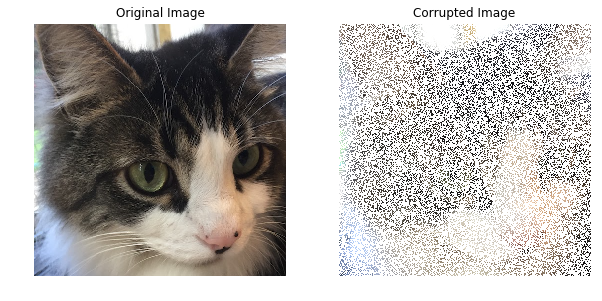

In [5]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
# Load the images.
u_orig = plt.imread("cat.png")
rows, cols, colors = u_orig.shape

# known is 1 if the pixel is known,
# 0 if the pixel was corrupted.
# The known matrix is initialized randomly.
known = np.zeros((rows, cols, colors))
for i in range(rows):
    for j in range(cols):
        if np.random.random() > 0.7:
            for k in range(colors):
                known[i, j, k] = 1
u_corr = known * u_orig

# Display the images.
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(u_orig, cmap='gray');
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(u_corr);
ax[1].set_title("Corrupted Image")
ax[1].axis('off');